In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
def load_clusters(cluster_l):
    """Load the cluster labels"""
    cluster_l = numpy.load(f"cluster_{cluster_l}.npy")
    return cluster_l

def load_dihe(sysname):
    """Load the barrier data."""
    basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    dihe    = numpy.load(f"{basedir}/ges_imi.{sysname}.ccco_dihe.npy")
    return numpy.squeeze(dihe)

def load_cluster_dihedrals(sysname, cluster_l):
    """Load the barrier data in one cluster."""
    cl = load_clusters(cluster_l)
    di = load_dihe(sysname)
    
    di_cl = di[cl[numpy.where(cl<500)]] if sysname=='d1' else di[cl[numpy.where(cl>=500)]-500]
    return di_cl + 360

load_cluster_dihedrals('d1', 3)

array([283.35378351, 293.24950145, 287.32927638, 287.30476869,
       290.14421602, 288.40945101, 289.38751612, 287.07782949,
       284.78491914, 282.49248659, 292.80767203, 282.9123663 ,
       284.10491491, 289.8140952 , 295.20929231, 287.03111144,
       290.15855076, 290.18923718, 281.56219415, 288.6707858 ,
       291.48967064, 294.56770722, 292.31404026, 292.8795678 ,
       278.82742571, 284.35183002, 286.53766131, 286.98644551,
       295.27027633, 286.34846163, 265.63744512, 291.98598956,
       282.69841138, 284.41505454, 287.34072671, 294.1364723 ,
       285.68996871, 286.07442292, 289.41317828, 289.49938977,
       285.73016679, 291.90574975, 290.83038156, 289.88447168,
       290.06513365, 290.45881614, 290.33781427, 291.67999921,
       292.9930011 , 287.89985095, 286.68619962, 263.04083941,
       288.27615893, 291.17944844, 288.89210791, 287.94008659,
       290.16288077, 287.70173311, 288.48930129, 287.36536648,
       289.0694985 , 291.97229574, 290.81001471, 289.41

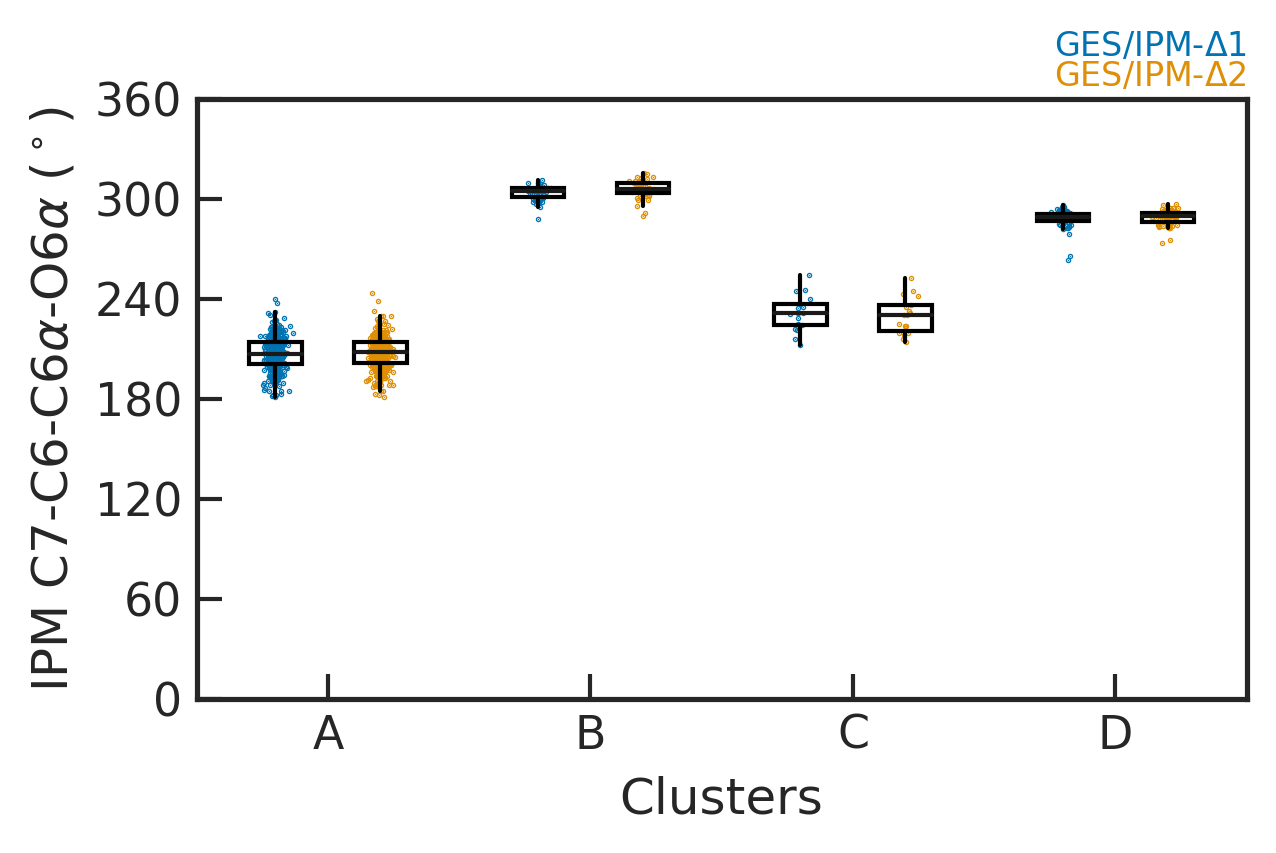

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 2.8), dpi=300, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.75/4.5, right=4.25/4.5, top=2.5/2.8, bottom=.5/2.8)


ax.text(1., 1.06, r'GES/IPM-$\Delta$1', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[0])
ax.text(1., 1.01, r'GES/IPM-$\Delta$2', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[1])

for cl in range(4):
    ener1_cl = load_cluster_dihedrals('d1', cl)
    ener2_cl = load_cluster_dihedrals('d2', cl)
    
    ener1_boxes = ax.boxplot(x=ener1_cl, positions=[cl-.2], widths=0.2, showcaps=False, 
                             showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
    
    ener2_boxes = ax.boxplot(x=ener2_cl, positions=[cl+.2], widths=0.2, showcaps=False, 
                             showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
    
    plt.setp(ener1_boxes["boxes"], facecolor='#00000000')
    plt.setp(ener2_boxes["boxes"], facecolor='#00000000')
    
    ax.scatter(y=ener1_cl, x=numpy.random.normal(loc=[cl-.2], scale=0.02, size=ener1_cl.shape[0]), 
               s=0.1, color=sns.color_palette('colorblind')[0])
    ax.scatter(y=ener2_cl, x=numpy.random.normal(loc=[cl+.2], scale=0.02, size=ener2_cl.shape[0]), 
               s=0.1, color=sns.color_palette('colorblind')[1])                        
        
ax.set_xlim(-.5, 3.5)
ax.set_ylim(0.,  360.)
ax.tick_params(which='major', direction='in', length=6, width=1)
ax.set_xticks(numpy.arange(4))
ax.set_yticks(numpy.arange(7)*60)
ax.set_xticklabels(['A', 'B',  'C', 'D'])

ax.set_ylabel(r'IPM C7-C6-C6$\alpha$-O6$\alpha$ $(^\circ)$')
ax.set_xlabel(r'Clusters')

fig.savefig('cluster_dihe.png')